In [3]:
import numpy as np
from scipy.ndimage import gaussian_filter1d as g1d
from scipy.stats import norm
import matplotlib.pylab as plt

OSA11 charge loss model is fitted to lines at ~60 keV and 511 keV.
Trivial extrapolation of the evolution to 20 keV would lead to clear mismatch with ground calibration lines (applicable early mission) and cross-calibration obsevations (applicable late mission).

At ~22 keV there is a Cd line complex ([see](https://xdb.lbl.gov/Section1/Table_1-2.pdf)), but it's hard to use it due to several effects (in the order from more important to less important):
* low energy cut-off by pixel threshold. This effect appears as shift to high energy. The LE threshold can be only reasonably determined with astrophysical source observations.
* energy resolution. Since since the broadened line is cutoff at low energy, it unequally broadens to high energy. Resolution at LE can only be rather approximately determined with astrophysical source observations.
* underlying background is very variable at low energy, and sensitive to CR-induced activation. Also astrophysical sources brighter than 300 mCrab are comparable to background level, and bias energy estimation depending on the source spectrum, usually to high energy. It is possible to exclude particularly anomalous background conditions, but long-term trends are hard to disentangle from other effects. See [there](https://volodymyrss.github.io/imgb/history.html)

For realistic magnitude of these effects, the shifts may lead to apparent line centroid from 20 to 30 keV, for actual line at 22 keV. See example below.



Below, shown separately background and source rates

<img src="https://volodymyrss.github.io/imgb/detelc_decomposed.png.1406121161.88b8ca491b">

![image info](https://volodymyrss.github.io/imgb/detelc_decomposed.png.1406121161.88b8ca491b)
![](https://volodymyrss.github.io/imgb/history.png.1406120164.1771a51d05)

(1e-05, 10)

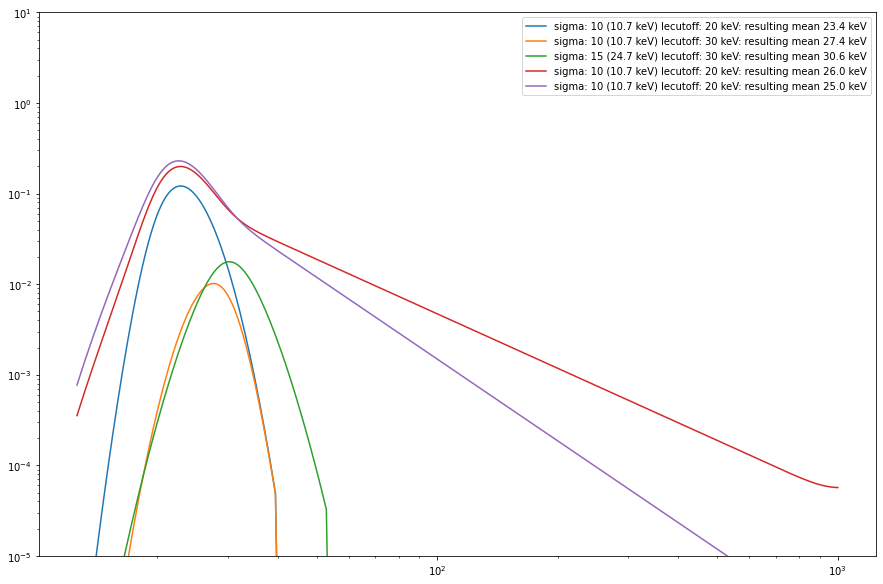

In [2]:
plt.figure(figsize=(15, 10))

en = np.logspace(1.1, 3, 300)


raw_line = norm(22, 0.1).pdf(en)

def leeffi(en, position=15, sharpness=14):
    return (en/position)**sharpness/(1+(en/position)**sharpness)

def observe(raw, sigma, lecutoff):
    return g1d(raw, sigma)*leeffi(en, lecutoff)


for sigma, lecutoff, extrabkg in [
    (10, 20, 0),
    (10, 30, 0),
    (15, 30, 0),    
    (10, 20, 0.05*(en/30)**-2),
    (10, 20, 0.05*(en/30)**-3),
]:
    m = en < 50
    obs_nole = observe(raw_line, sigma, 0.1)
    obs = observe(raw_line + extrabkg, sigma, lecutoff)

    mean = np.sum((en*obs)[m])/np.sum(obs[m])
    width = np.nansum((obs_nole*en**2)[m])/np.nansum(obs_nole[m]) - (np.nansum((obs_nole*en)[m])/np.nansum(obs_nole[m]))**2

    plt.plot(
        en,
        obs,
        label=f"sigma: {sigma} ({width:.1f} keV) lecutoff: {lecutoff} keV: resulting mean {mean:.1f} keV"
    )



plt.loglog()
plt.legend()

plt.ylim([1e-5, 10])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


cache stack: [[MemCacheIntegralFallback of size 0 at /sps/integral/data/reduced/ddcache/]]
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 22 31.642 46.099 330.68 2.2329 2.2329 8.1349 45.909 0.26057 0
config 0: 31.642
Finnished in 88 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 32.458 123.1 41.074 3.7006 3.7006 7.2887 24.058 0.31234 0
config 0: 32.458
Finnished in 606 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 150 31.495 314.55 7.0405 5.8185 5.8185 5.2964 12.6 0.22292 0
config 0: 31.495
Finnished in 865 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 31.494 1071.6 5.279 10.739 10.739 1.5899 3.1552 0.077593 0
config 0: 31.494
Finnished in 817 milliseconds. 


Text(0, 0.5, 'RT (ISGRI Rise Time channel)')

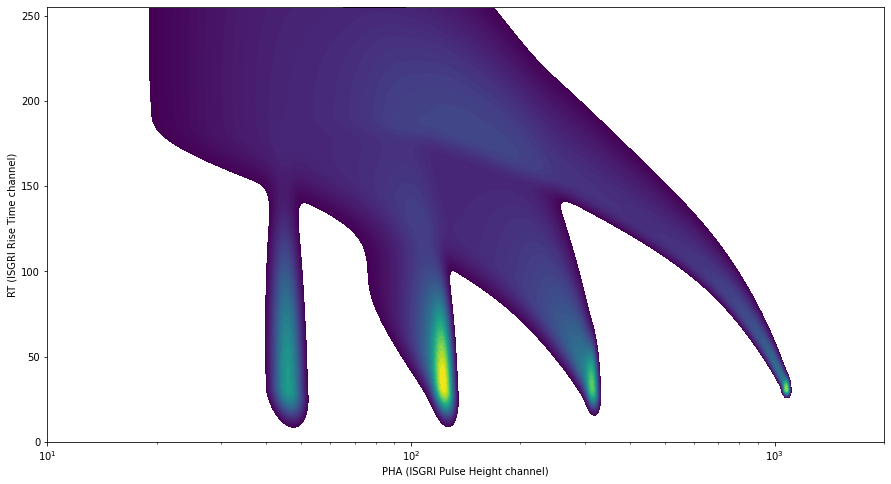

In [4]:
import sys
import os
import numpy as np
import importlib

os.environ['EDDOSA_TOOLS_DIR'] = os.getcwd() + '/eddosa_tools/'

sys.path.insert(0, 'dda-ddosa')
sys.path.insert(0, 'dda-eddosa')
sys.path.insert(0, 'eddosa_tools/fit1d')
sys.path.insert(0, 'lut2model/python')

import lut2model
import bipar_model
import eddosa

#lut2model.render_bipar_m0()

bpm = eddosa.BiparModel()
bpm.bipar_model
det = bipar_model.detector()

pha_2d, rt_2d = np.meshgrid(np.arange(2048), np.arange(256))


bip = np.zeros_like(pha_2d, dtype=float)
    
for en in [22, 59, 150, 511]:
    _bip = bipar_model.make_bipar_monoenergetic(det, en).transpose()
    
    bip += _bip / np.nanquantile(_bip[_bip>_bip.max()/100].flatten(), 0.5)

plt.figure(figsize=(15, 8))
plt.contourf(pha_2d, rt_2d, bip**0.5, levels=np.logspace(-1, 0)*np.nanmax(bip**0.5))

plt.semilogx()
plt.xlim([10, 2000])

plt.xlabel('PHA (ISGRI Pulse Height channel)')
plt.ylabel('RT (ISGRI Rise Time channel)')

#TODO: total event number lost to high RT threshold
#TODO: discontinuities from abs edges

render_bipar default
m: 10
n: 3000
config 0: 0
first row: 22 31.642 11.072 330.68 2.2329 2.2329 8.1349 45.909 0.1046 0
config 0: 31.642
Finnished in 86 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 32.458 29.566 41.074 3.7006 3.7006 7.2887 24.058 0.20803 0
config 0: 32.458
Finnished in 614 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 31.494 257.38 5.279 10.739 10.739 1.5899 3.1552 0.24913 0
config 0: 31.494
Finnished in 840 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 22 31.642 15.635 330.68 2.2329 2.2329 8.1349 45.909 0.13622 0
config 0: 31.642
Finnished in 89 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 32.458 41.75 41.074 3.7006 3.7006 7.2887 24.058 0.24934 0
config 0: 32.458
Finnished in 607 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 31.494 363.43 5.279 10.739 10.739 1.5899 3.1552 0.20353 0
config 0: 31.494
Finnished in 822 milli

Text(0, 0.5, 'RT (ISGRI Rise Time channel)')

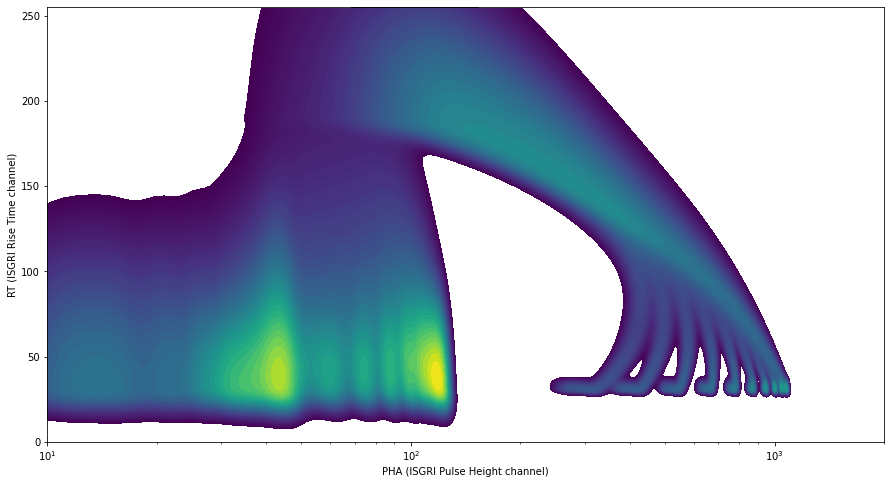

In [5]:
bip = np.zeros_like(pha_2d, dtype=float)

det_base = bipar_model.detector()

lrt_lines = []

for tau_loss_factor in np.logspace(-1.5, 0, 10):
    det = bipar_model.detector()
    det.tau_e = det_base.tau_e * tau_loss_factor

    for en in [22, 59, 511]:
        _bip = bipar_model.make_bipar_monoenergetic(det, en).transpose()

        for rt1, rt2 in [(15,30), (50,70)]:
            ltr_bip = _bip[rt1:rt2, :].sum(0)
            lrt_lines.append(
                dict(
                    rt1=rt1,
                    rt2=rt2,
                    energy=en,
                    tau_e=det.tau_e,
                    mean_pha=np.sum(pha_2d[0,:]*ltr_bip)/np.sum(ltr_bip)
                )
                )
        
        bip += _bip / np.nanquantile(_bip[_bip>_bip.max()/100].flatten(), 0.5)


plt.figure(figsize=(15, 8))
plt.contourf(pha_2d, rt_2d, bip**0.5, levels=np.logspace(-1, 0)*np.nanmax(bip**0.5))

plt.semilogx()
plt.xlim([10, 2000])

plt.xlabel('PHA (ISGRI Pulse Height channel)')
plt.ylabel('RT (ISGRI Rise Time channel)')

# for vl in vlines:
#     plt.axvline(vl)

Charge loss model, in principle, results in a prescription to how low-energy part evolves. This prescription is somewaht different from simple linear change of offset and gain. But not as different as what is observed at low energy.

Prescriptions for evolution at different energies are are shown below.

Text(0, 0.5, 'fraction of PH lost')

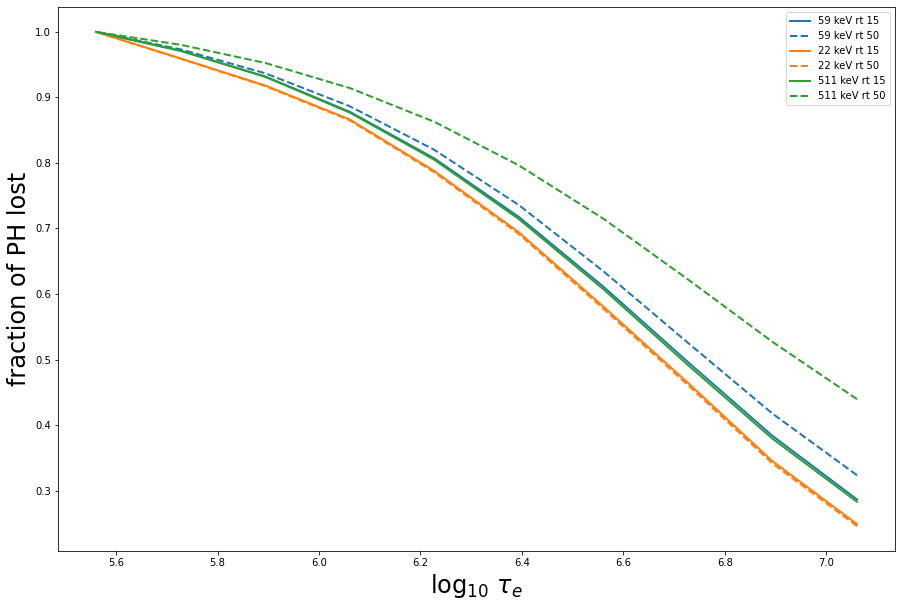

In [11]:
plt.figure(figsize=(15, 10))

for en in set([l['energy'] for l in lrt_lines]):
    c = None
    ls_list=['-','--']
    for rt1 in [15, 50]:
        mean_phas = np.array([l['mean_pha'] for l in lrt_lines if l['energy'] == en and l['rt1'] == rt1])
        c=plt.plot(
            [-np.log10(l['tau_e']) for l in lrt_lines if l['energy'] == en  and l['rt1'] == rt1],
            mean_phas/mean_phas.max(),
            label=f"{en} keV rt {rt1}",
            c=c,
            ls=ls_list.pop(0),
            lw=2
        )[0].get_color()

plt.legend()
#plt.semilogx()
plt.xlabel(r"log$_{10}~\tau_e$", size=24)
plt.ylabel(r"fraction of PH lost", size=24)

# Mismatch between no-polarization model and in-flight source observations

However, observations with cyclotron line sources indicate excessive compression of energy scale by up to 10% at 30 keV (see https://linked-open-data.space/)
Roughly speaking, the model predicts that 30 keV converts PHA=30 to 2021. But we observe that 30 keV converts to PHA=50. #TODO: think again!
It means that charge collection for 30 keV depositions (which, inevitably, all happen near the detector surface) remains efficient, despite substantial loss of electron lifetime, as seen in charge collection for 511 keV (which happens in the whole pixel).

This compression is different at higher RT. Specifically, high-energy line PH is dropping slower than low-energy line PH. This effect appears as the bipar line becoming more vertical. This change is very apparent, and leads to peculiar effects: 
* energy resolution for high RT, originally very poor, is improving with time. It is because the resolution is determined primarily by RT measurement uncertainty, and as the bipar line becomes vertical, RT uncertainty becomes irrelevant. 
* low-RT energy resolution is additionally degraded with time by the "wiggle" in the bipar track, associated with electron transport (see plots). 
* At some point (~2010?) energy resolution for high RT becomes superior to that for low RT. This results in characteristic change of the line shape: narrow core now corresponds to high RT and not low RT as it was in the beginning.

#TODO: think! 
So the effect is the opposite of what is observed.

#TODO: compute resolution improvment and best line resolving power

#TODO: Polarization is the opposite of usual degradation, so is it 




There are not many ways to explain this. The best I can suggest for now is changes in detector homogenuity: polarization and/or charge carrier properties.

#TODO: combine and estimate field and detector properties inhomegenuity effect
#TODO: model field inhomogenuity to see what it does?

Astro observations seems to suggest that constant offset would work.

#TODO: end-goal here is to show how to:
* enforce constant offset in efficiency, events, response
* centralize response

# Detector polarization

As discussed above, assuming no polarization, or uniform polarization does not reproduce low-energy response compatible with observations.
Since detector is always polarized, it's hard to distinguish effect of degradation of charge carrior properties due to irradiation from
polarization. Especially if the polarization is inhomogenous. And since polarization effect itself is known to depend on irradiation dose itself, just as charge carried properties do.







render_bipar default
m: 10
n: 3000
config 0: 0
first row: 22 56.496 34.7 330.68 3.8497 3.8497 11.455 95.759 0.22742 0
config 0: 56.496
Finnished in 125 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 57.312 92.594 41.074 6.3922 6.3922 10.221 49.72 0.31274 0
config 0: 57.312
Finnished in 394 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 56.348 806.72 5.279 18.506 18.506 2.2406 6.5924 0.1054 0
config 0: 56.348
Finnished in 371 milliseconds. 


/tmp/ipykernel_4073773/3417265133.py:25: RuntimeWarning: invalid value encountered in double_scalars
  mean_pha=np.sum(pha_2d[0,:]*ltr_bip)/np.sum(ltr_bip)


render_bipar default
m: 10
n: 3000
config 0: 0
first row: 22 52.132 36.515 330.68 3.5321 3.5321 10.879 85.75 0.23355 0
config 0: 52.132
Finnished in 137 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 52.947 97.452 41.074 5.8867 5.8867 9.7117 44.575 0.31377 0
config 0: 52.947
Finnished in 378 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 51.983 848.89 5.279 16.968 16.968 2.1276 5.9021 0.10008 0
config 0: 51.983
Finnished in 386 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 22 48.291 38.173 330.68 3.2285 3.2285 10.369 77.383 0.23884 0
config 0: 48.291
Finnished in 119 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 49.106 101.89 41.074 5.3935 5.3935 9.2618 40.272 0.31428 0
config 0: 49.106
Finnished in 452 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 48.143 887.41 5.279 15.503 15.503 2.0278 5.3251 0.09556 0
config 0: 48.143
Finnished in 455 mi

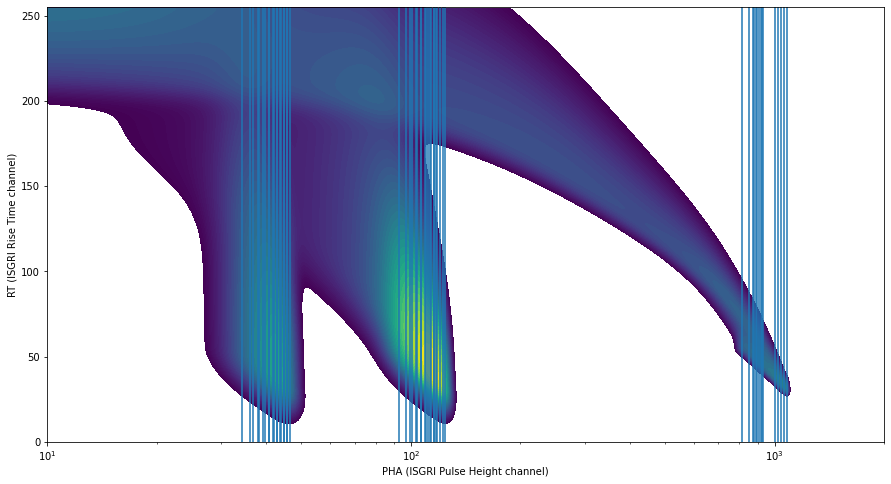

In [23]:
bip = np.zeros_like(pha_2d, dtype=float)

det_base = bipar_model.detector()

lrt_lines = []

#for tau_loss_factor in np.logspace(-1., 0, 3):
for V_loss_factor in np.logspace(-0.5, 0, 10):
    det = bipar_model.detector()
    #det.tau_e = det_base.tau_e * tau_loss_factor
    det.V = det_base.V * V_loss_factor

    for en in [22, 59, 511]:
        _bip = bipar_model.make_bipar_monoenergetic(det, en).transpose()

        for rt1, rt2 in [(15,30), (50,70)]:
            ltr_bip = _bip[rt1:rt2, :].sum(0)
            lrt_lines.append(
                dict(
                    rt1=rt1,
                    rt2=rt2,
                    energy=en,
                    tau_e=det.tau_e,
                    V=det.V,
                    mean_pha=np.sum(pha_2d[0,:]*ltr_bip)/np.sum(ltr_bip)
                )
                )
        
        bip += _bip / np.nanquantile(_bip[_bip>_bip.max()/100].flatten(), 0.5)


plt.figure(figsize=(15, 8))
plt.contourf(pha_2d, rt_2d, bip**0.5, levels=np.logspace(-1, 0)*np.nanmax(bip**0.5))

plt.semilogx()
plt.xlim([10, 2000])

plt.xlabel('PHA (ISGRI Pulse Height channel)')
plt.ylabel('RT (ISGRI Rise Time channel)')

for vl in lrt_lines:
    plt.axvline(vl['mean_pha'])

(124.10263340389898, 33.84469851812158)

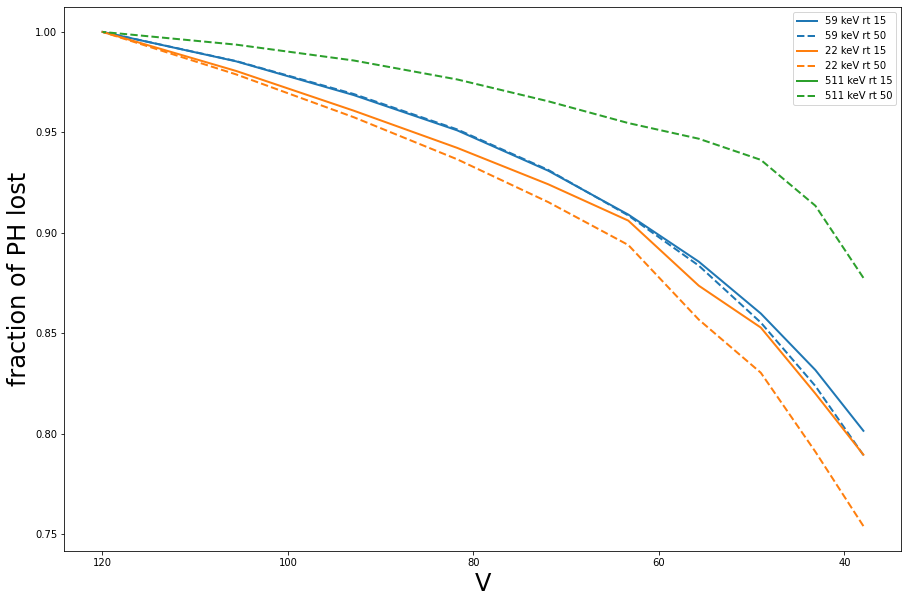

In [25]:
plt.figure(figsize=(15, 10))

for en in set([l['energy'] for l in lrt_lines]):
    c = None
    ls_list=['-','--']
    for rt1 in [15, 50]:
        mean_phas = np.array([l['mean_pha'] for l in lrt_lines if l['energy'] == en and l['rt1'] == rt1])
        c=plt.plot(
            [l['V'] for l in lrt_lines if l['energy'] == en  and l['rt1'] == rt1],
            mean_phas/mean_phas.max(),
            label=f"{en} keV rt {rt1}",
            c=c,
            ls=ls_list.pop(0),
            lw=2
        )[0].get_color()

plt.legend()
#plt.semilogx()
plt.xlabel(r"V", size=24)
plt.ylabel(r"fraction of PH lost", size=24)

ax=plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])

As shown in the previous picture, effective drop of the bias (V) leading to presumably homogenous drop in the field in the detector, would cause more rapid loss of gain at low energy than at high energy. Which is the opposite of what is observed. 

So, some other effect is at play, possibly inhomogenous polarization. It is not immediately clear what kind.

Fortunately, polarization can be also observed directly following detector switch-on. It can not be used to give direct prescription for long-term polarization change, but it can give an insight.


# Intra-revolution polarization

Polarization develops after detector switch-on. It is not guaranteed that at the revolution start the detector is completely unpolarized. This usually happens at the revolution start, but may also happen in the middle of the revolution, e.g. following IREM reset. 
Short off-time cases partial recovery of the gain. Longer off-time recovers the gain to the same state at which it was before. The fact that some basic level is recovered after some hours, indicates that some stationary state exists and is observed at the beginning of the orbit. It is still not certain if this state is completely unpolarized.

After about 2 days (near the orbit end) the evolution typically stops. This indicates that a new stationary state is reached. It is not reached in all orbits, and this effect also evolves with mission lifetime.

![](https://volodymyrss.github.io/imgb/lines_rev.png.1422363474.f83d1aa7f1)

Polarization affects high-RT and low-RT data differently as polarization progresses after switch-on:
* low-RT transport is progressively degraded (by about 2%)
* high-RT transport is progressively improved (by about 2%)

![](https://volodymyrss.github.io/imgb/rtevo665.png.1438160162.7256945645)

This can be also seen in the PHA-RT diagram (left: in the beginning of the revoluion, right: near the end):

![](https://volodymyrss.github.io/imgb/early_late_bipar.jpeg.1422893544.c96ba39f09)


Normally, high-RT counts correspond to high-depth interactions.
Change in field inevitably affects both RT and PHA. 

2% decrease in low-RT charge collection corresponds to about 2% change in field. # check???

render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 35.434 119.05 41.074 3.8938 3.8938 7.6446 26.664 0.31317 0
config 0: 35.434
Finnished in 559 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 34.47 1036.5 5.279 11.258 11.258 1.6689 3.5033 0.080619 0
config 0: 34.47
Finnished in 793 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 59 32.458 123.1 41.074 3.7006 3.7006 7.2887 24.058 0.31234 0
config 0: 32.458
Finnished in 610 milliseconds. 
render_bipar default
m: 10
n: 3000
config 0: 0
first row: 511 31.494 1071.6 5.279 10.739 10.739 1.5899 3.1552 0.077593 0
config 0: 31.494
Finnished in 823 milliseconds. 


Text(0, 0.5, 'RT (ISGRI Rise Time channel)')

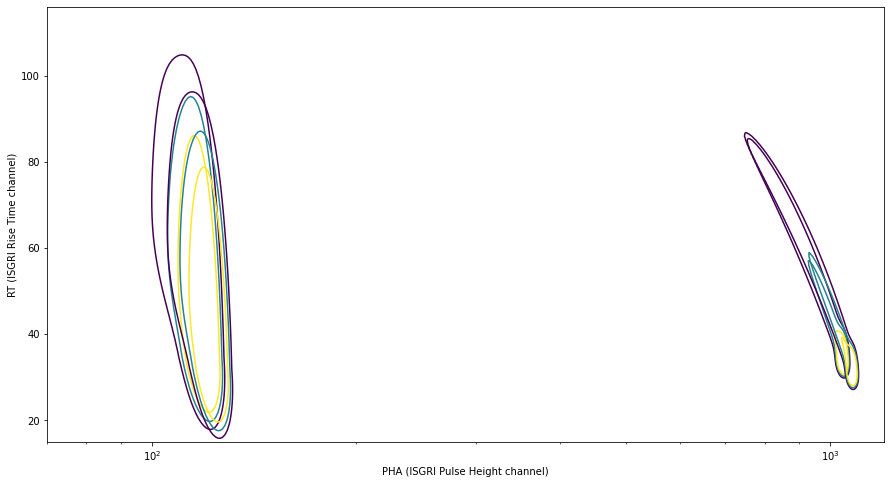

In [104]:
bip = np.zeros_like(pha_2d, dtype=float)

det_base = bipar_model.detector()

lrt_lines = []

plt.figure(figsize=(15, 8))

#for tau_loss_factor in np.logspace(-1., 0, 3):
for V_loss_factor in np.logspace(-0.1, 0, 2):
    det = bipar_model.detector()
    #det.tau_e = det_base.tau_e * tau_loss_factor
    det.V = det_base.V * V_loss_factor

    for en in [59, 511]:
        _bip = bipar_model.make_bipar_monoenergetic(det, en).transpose()

        for rt1, rt2 in [(15,30), (50,70)]:
            ltr_bip = _bip[rt1:rt2, :].sum(0)
            lrt_lines.append(
                dict(
                    rt1=rt1,
                    rt2=rt2,
                    energy=en,
                    tau_e=det.tau_e,
                    V=det.V,
                    mean_pha=np.sum(pha_2d[0,:]*ltr_bip)/np.sum(ltr_bip),
                    bip=_bip
                )
                )
        
        bip += _bip / np.nanquantile(_bip[_bip>_bip.max()/100].flatten(), 0.5)


        plt.contour(pha_2d, rt_2d, _bip**0.5, levels=np.logspace(-0.5, -0.3, 3)*np.nanmax(_bip**0.5))

plt.semilogx()
plt.xlim([70, 1200])
plt.ylim([15, 116])

plt.xlabel('PHA (ISGRI Pulse Height channel)')
plt.ylabel('RT (ISGRI Rise Time channel)')

# for vl in lrt_lines:
#     plt.axvline(vl['mean_pha'])

/tmp/ipykernel_4073773/1990844863.py:14: RuntimeWarning: invalid value encountered in true_divide
  pha = (_bip*pha_2d).sum(1)/_bip.sum(1)


(15.0, 116.0)

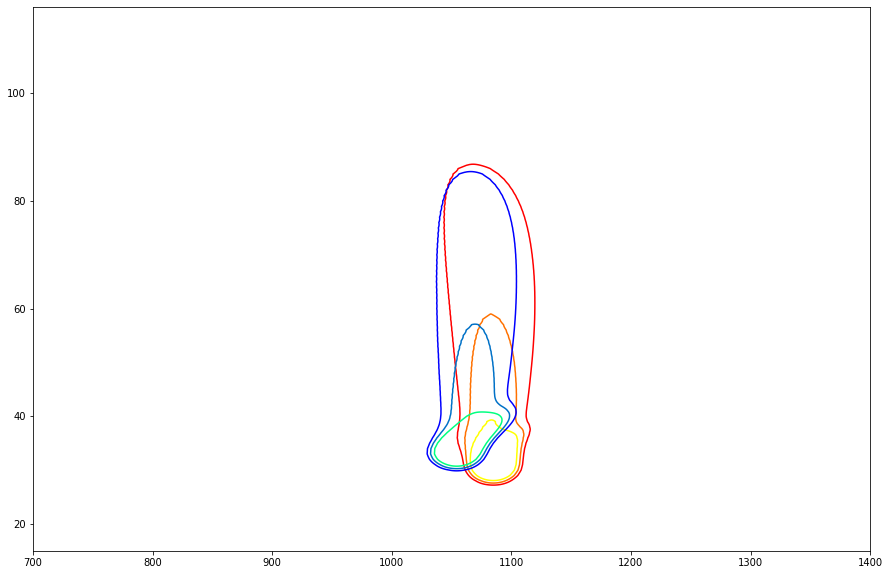

In [144]:
from scipy.interpolate import interp1d
from matplotlib import cm

plt.figure(figsize=(15,10))

for pair in [
        [lrt_lines[-1]['bip'], lrt_lines[-6]['bip']],
        [lrt_lines[0]['bip'], lrt_lines[4]['bip']]
        ]:
        cmaps = [cm.winter, cm.autumn]*4
        _bip = pair[0]

        rt = rt_2d[:,0]
        pha = (_bip*pha_2d).sum(1)/_bip.sum(1)
        m = ~np.isnan(pha)
        lut2 = interp1d(rt[m], pha[m]/np.nanmax(pha), bounds_error=False)

        for _bip in pair:
                plt.contour(pha_2d/np.outer(lut2(rt), np.ones(2048)), rt_2d, _bip**0.5, levels=np.logspace(-0.5, -0.3, 3)*np.nanmax(_bip**0.5),
                                cmap=cmaps.pop()
                        )


plt.xlim([700, 1400])
plt.ylim([15, 116])

#plt.xlabel()

#plt.semilogx()


* In particular, it does not appear possible to achieve improvement in the high-RT collection in this way.
The tracks can never cross. An idea to achieve this was by stretiching the RT, which goes part of the way, but not enough.
* The RT shift at low RT is incompatible with observations

Inhomogenous field may be used to explain it.

Specifically, increase of field at higher depth and decrease at lower depth might produce the desired effects.

# Effect of applying NOMEX correction on reconstructed events


TODO: do

In [ ]:
#TODO: deduce gain evolution just from the first line, assuming constant offset.
